In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import socceraction

from statsbombpy import sb

In [2]:
from socceraction.data.statsbomb import StatsBombLoader

path = 'D:\Football Data Science\Data\Event\Statsbomb\data'

api = StatsBombLoader(getter="local", root=path)

In [3]:
X_Bundesliga = pd.read_csv('data/X_1516_Bundesliga.csv', index_col=0)
X_LaLiga = pd.read_csv('data/X_1516_LaLiga.csv', index_col=0)
X_Ligue1 = pd.read_csv('data/X_1516_Ligue1.csv', index_col=0)
X_PremierLeague = pd.read_csv('data/X_1516_PremierLeague.csv', index_col=0)
X_SerieA = pd.read_csv('data/X_1516_SerieA.csv', index_col=0)

X = pd.concat([X_Bundesliga, X_LaLiga, X_Ligue1, X_PremierLeague, X_SerieA], ignore_index=True)
X

,period_id_a0,time_seconds_a0,time_seconds_overall_a0,period_id_a1,time_seconds_a1,time_seconds_overall_a1,period_id_a2,time_seconds_a2,time_seconds_overall_a2,team_1,...,dy_a2,goalscore_team,goalscore_opponent,goalscore_diff,actiontype_a0,actiontype_a1,actiontype_a2,bodypart_a0,bodypart_a1,bodypart_a2
0,1,0.4820,0.4820,1,0.4820,0.4820,1,0.4820,0.4820,True,...,0.936535,0,0,0,pass,pass,pass,foot,foot,foot
1,1,0.7085,0.7085,1,0.4820,0.4820,1,0.4820,0.4820,True,...,0.936535,0,0,0,receival,pass,pass,foot,foot,foot
2,1,0.9350,0.9350,1,0.7085,0.7085,1,0.4820,0.4820,True,...,0.936535,0,0,0,dribble,receival,pass,foot,foot,foot
3,1,1.0150,1.0150,1,0.9350,0.9350,1,0.7085,0.7085,True,...,0.000000,0,0,0,pass,dribble,receival,foot,foot,foot
4,1,1.5910,1.5910,1,1.0150,1.0150,1,0.9350,0.9350,True,...,-0.436904,0,0,0,receival,pass,dribble,foot,foot,foot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474172,2,2930.8385,5630.8385,2,2928.5210,5628.5210,2,2927.6690,5627.6690,False,...,1.000000,1,2,-1,interception,pass,dribble,foot,foot,foot
5474173,2,2933.1560,5633.1560,2,2930.8385,5630.8385,2,2928.5210,5628.5210,True,...,-0.542151,1,2,-1,dribble,interception,pass,foot,foot,foot
5474174,2,2935.1310,5635.1310,2,2933.1560,5633.1560,2,2930.8385,5630.8385,True,...,-0.000000,1,2,-1,pass,dribble,interception,foot,foot,foot
5474175,2,2938.2210,5638.2210,2,2935.1310,5635.1310,2,2933.1560,5633.1560,False,...,0.208129,2,1,1,interception,pass,dribble,foot,foot,foot


In [4]:
info_Bundesliga = pd.read_csv('data/info_1516_Bundesliga.csv', index_col=0)
info_LaLiga = pd.read_csv('data/info_1516_LaLiga.csv', index_col=0)
info_Ligue1 = pd.read_csv('data/info_1516_Ligue1.csv', index_col=0)
info_PremierLeague = pd.read_csv('data/info_1516_PremierLeague.csv', index_col=0)
info_SerieA = pd.read_csv('data/info_1516_SerieA.csv', index_col=0)

info = pd.concat([info_Bundesliga, info_LaLiga, info_Ligue1, info_PremierLeague, info_SerieA], ignore_index=True)
info

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,type_name,bodypart_name
0,3890561,644e16d7-10ca-45f0-8128-fc0055d6f753,0,1,0.4820,175,8387.0,53.33125,33.9575,-0.7000,1.870,0,4,pass,foot_left
1,3890561,644e16d7-10ca-45f0-8128-fc0055d6f753,1,1,0.7085,175,5460.0,52.63125,35.8275,0.0000,0.000,23,0,receival,foot
2,3890561,329a1879-2521-4614-8c68-b4798b0e5d23,2,1,0.9350,175,5460.0,52.63125,35.8275,-0.7000,-0.340,21,0,dribble,foot
3,3890561,77e2ddaf-6de3-49e7-a318-7d765799b543,3,1,1.0150,175,5460.0,51.93125,35.4875,-4.8125,-3.230,0,4,pass,foot_left
4,3890561,77e2ddaf-6de3-49e7-a318-7d765799b543,4,1,1.5910,175,6039.0,47.11875,32.2575,0.0000,0.000,23,0,receival,foot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474172,3878540,71006080-9dd2-401c-b02f-d8f8947644c5,3306,2,2930.8385,240,7174.0,12.64375,33.4475,-0.0000,-0.000,24,0,interception,foot
5474173,3878540,34beca91-bdec-408c-81d3-d423e74ec518,3307,2,2933.1560,240,7174.0,12.64375,33.4475,9.1875,-1.955,21,0,dribble,foot
5474174,3878540,7c4c3eae-84c0-4da0-baa4-e87d11376565,3308,2,2935.1310,240,7174.0,21.83125,31.4925,42.4375,-9.180,0,5,pass,foot_right
5474175,3878540,d4d557ff-725e-4cfa-afee-e14fa9e3ed4b,3309,2,2938.2210,236,7778.0,40.73125,45.6875,0.0000,0.000,24,0,interception,foot


### 计算VAEP得分

In [5]:
import joblib

model_score = joblib.load('data/model_score.dat')
model_concede = joblib.load('data/model_concede.dat')

categorical_features = ['period_id_a0', 'period_id_a1', 'period_id_a2', 'actiontype_a0', 'actiontype_a1', 'actiontype_a2', 'bodypart_a0', 'bodypart_a1', 'bodypart_a2']
for col in categorical_features:
    if X[col].dtype != 'category':
        # print(col, X[col].dtype)
        X[col] = X[col].astype('category')
        
Y_hat = pd.DataFrame({'scores': model_score.predict_proba(X)[:,1], 'concedes': model_concede.predict_proba(X)[:,1]})

import socceraction.atomic.vaep.formula as vaepformula

values = pd.DataFrame(columns=['offensive_value', 'defensive_value', 'vaep_value'], index=Y_hat.index)

inds = info.groupby('game_id').indices # dict of game_id:indices
for game_id, game_inds in inds.items():
    info0 = info.loc[game_inds]
    Y_hat0 = Y_hat.loc[game_inds]
    value0 = vaepformula.value(info0, Y_hat0["scores"], Y_hat0["concedes"]) # 对于开球那下动作没有做处理，但确实也没必要
    values.loc[game_inds] = value0
    
values['player_id'] = info['player_id'].astype(int)
values

,offensive_value,defensive_value,vaep_value,player_id
0,0.0,-0.0,0.0,8387
1,-0.000008,-0.000062,-0.00007,5460
2,0.000025,0.000019,0.000045,5460
3,0.000086,-0.00001,0.000076,5460
4,-0.000085,0.000065,-0.00002,6039
...,...,...,...,...
5474172,0.000565,0.020412,0.020978,7174
5474173,0.001372,0.001118,0.00249,7174
5474174,0.001457,-0.00016,0.001297,7174
5474175,0.001817,0.002223,0.00404,7778


### 案例分析

In [6]:
event_id_0 = '5e8ba3db-ecc3-475f-890d-44f3993858d9'
info[info['original_event_id'] == event_id_0]

,game_id,original_event_id,action_id,period_id,time_seconds,team_id,player_id,x,y,dx,dy,type_id,bodypart_id,type_name,bodypart_name
2010643,266424,5e8ba3db-ecc3-475f-890d-44f3993858d9,496,1,606.146,217,5246.0,92.79375,28.4325,12.1625,8.585,11,5,shot,foot_right
2010644,266424,5e8ba3db-ecc3-475f-890d-44f3993858d9,497,1,606.146,217,5246.0,104.95625,37.0175,-0.0000,-0.000,27,5,goal,foot_right


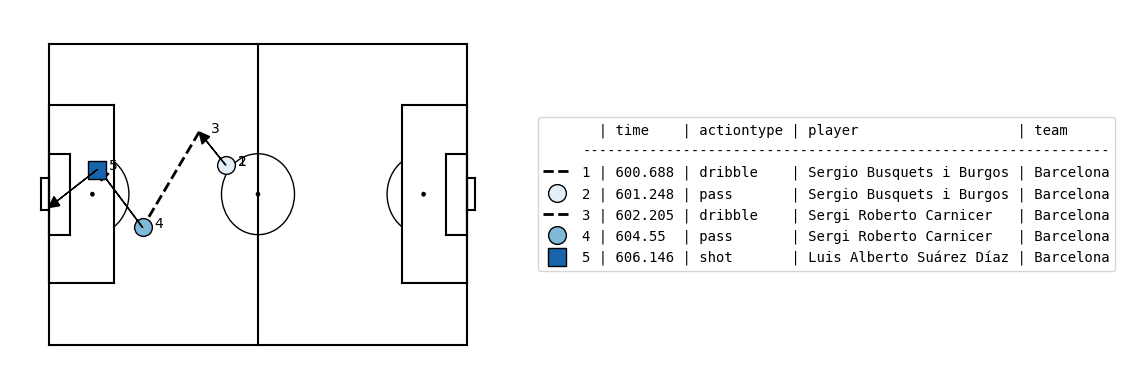

In [7]:
import socceraction.spadl as spadl
import matplotsoccer as mps

df_games_0 = api.games(competition_id=11, season_id=27) # 西甲2015/2016赛季

ind_to_check = 2010644 # 根据上面的数据选择考察的事件
info_to_check = info.loc[ind_to_check]
game_to_check, action_to_check = info_to_check['game_id'], info_to_check['original_event_id']

df_teams = api.teams(game_id=game_to_check)
df_players = api.players(game_id=game_to_check)

df_events_to_check = api.events(game_id=game_to_check)
home_team_to_check = int(df_games_0[df_games_0['game_id'] == game_to_check]["home_team_id"])
df_actions_to_check = spadl.statsbomb.convert_to_actions(df_events_to_check, home_team_to_check)

ind_to_check_in_game = df_actions_to_check[df_actions_to_check['original_event_id'] == action_to_check].index[0]
df_actions_to_check_0 = df_actions_to_check.loc[(ind_to_check_in_game - 4):(ind_to_check_in_game)]
df_actions_to_check_0 = spadl.add_names(df_actions_to_check_0)
df_actions_to_check_0 = df_actions_to_check_0.merge(df_teams).merge(df_players)

mps.actions(
    location=df_actions_to_check_0[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_to_check_0.type_name,
    team=df_actions_to_check_0.team_name,
    result=df_actions_to_check_0.result_name == "success",
    label=df_actions_to_check_0[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False
)

In [8]:
lags = 8

Y_hat_0 = Y_hat.loc[(ind_to_check - lags):(ind_to_check)]
Y_hat_0.columns = ['Y_hat_scores', 'Y_hat_concedes']

values_0 = values.loc[(ind_to_check - lags):(ind_to_check)]
values_0 = pd.merge(values_0, df_players[['player_id', 'player_name', 'nickname']])
values_0['player_name'] = values_0.apply(lambda row: row['nickname'] if pd.notna(row['nickname']) else row['player_name'], axis=1)
values_0 = values_0.drop(['player_id', 'nickname'], axis=1)

X_0 = X.loc[(ind_to_check - lags):(ind_to_check), ['actiontype_a0']]
X_0.columns = ['actiontype']

vaep_detailed = pd.concat([Y_hat_0.reset_index(drop=True),
                           values_0.reset_index(drop=True),
                           X_0.reset_index(drop=True)], axis=1)
vaep_detailed

,Y_hat_scores,Y_hat_concedes,offensive_value,defensive_value,vaep_value,player_name,actiontype
0,0.004101,0.000183,-0.000586,0.000029,-0.000557,Sergio Busquets,receival
1,0.003670,0.000231,-0.000431,-0.000048,-0.000479,Sergio Busquets,dribble
2,0.006676,0.000151,0.003006,0.000079,0.003085,Sergio Busquets,pass
3,0.006716,0.000125,0.00004,0.000027,0.000067,Sergi Roberto,receival
4,0.037729,0.000148,0.031012,-0.000023,0.030989,Sergi Roberto,dribble
5,0.059373,0.000113,0.021645,0.000035,0.02168,Sergi Roberto,pass
6,0.103002,0.000150,0.043629,-0.000037,0.043592,Luis Suárez,receival
7,0.228802,0.000039,0.1258,0.00011,0.125911,Luis Suárez,shot
8,0.999811,0.000073,0.771009,-0.000033,0.770976,Luis Suárez,goal


进球动作序列：
- Sergio Busquets: ['dribble', 'pass']
- Sergi Roberto: ['dribble', 'pass']
- Luis Suárez: 'shot'

In [9]:
vaep_delta = pd.DataFrame({
    'action':['Sergio Busquets dribble + pass', 'Sergi Roberto dribble + pass', 'Luis Suárez shot', 'Luis Suárez goal'],
    'P_score':[vaep_detailed.loc[2,'Y_hat_scores'], vaep_detailed.loc[5,'Y_hat_scores'],
               vaep_detailed.loc[7,'Y_hat_scores'], vaep_detailed.loc[8,'Y_hat_scores']],
    'vaep_value':[vaep_detailed.loc[0:2,'vaep_value'].sum(), vaep_detailed.loc[3:5,'vaep_value'].sum(),
                  vaep_detailed.loc[6:7,'vaep_value'].sum(), vaep_detailed.loc[8,'vaep_value']]
    })

print('xG:', df_events_to_check[df_events_to_check['event_id'] == event_id_0]['extra'].iloc[0]['shot']['statsbomb_xg'])

print('Predicted xG:', vaep_detailed.loc[7, 'Y_hat_scores'])

vaep_delta

xG: 0.25853002
Predicted xG: 0.22880214


,action,P_score,vaep_value
0,Sergio Busquets dribble + pass,0.006676,0.002050
1,Sergi Roberto dribble + pass,0.059373,0.052735
2,Luis Suárez shot,0.228802,0.169502
3,Luis Suárez goal,0.999811,0.770976


### SHAP可视化理解

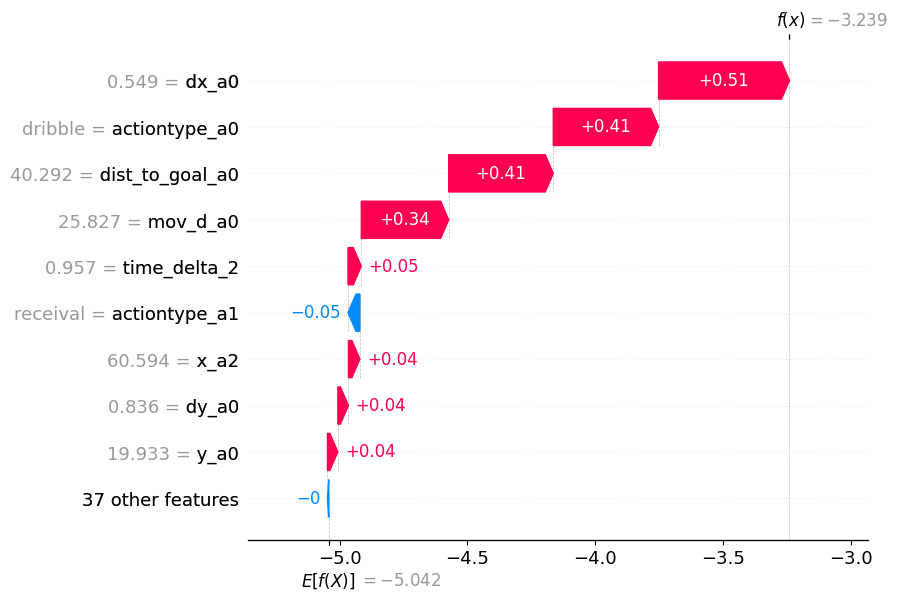

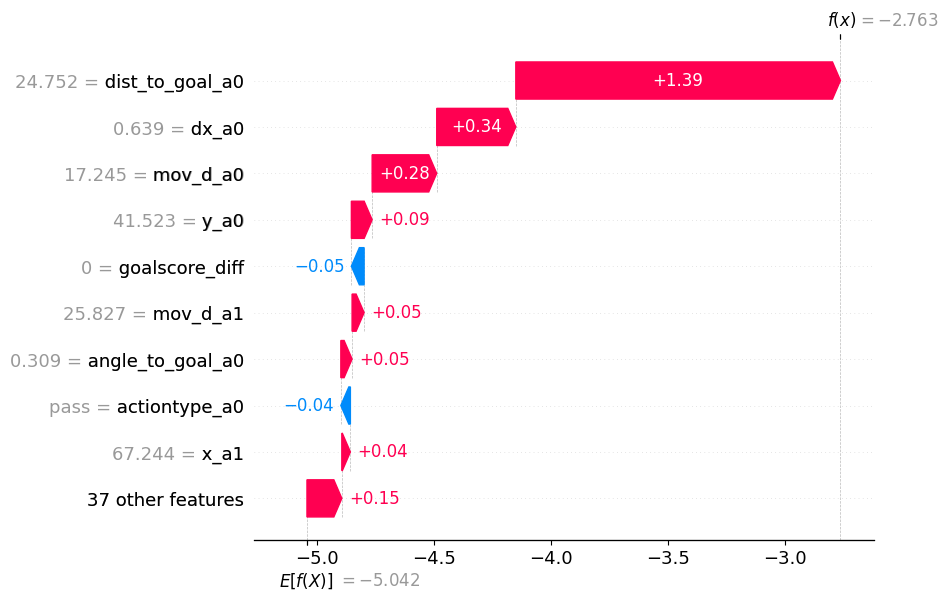

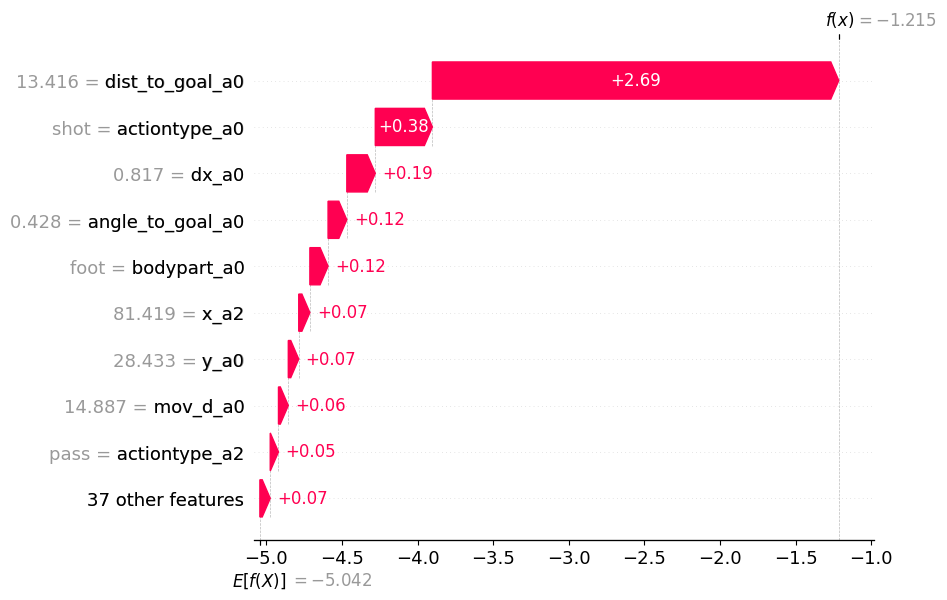

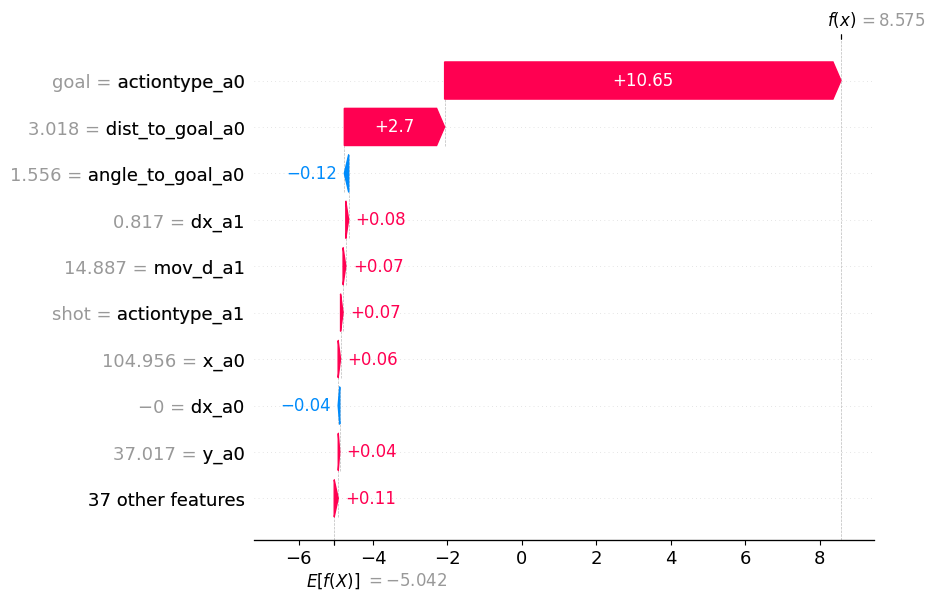

In [10]:
import shap

explainer = shap.Explainer(model_score)
shap_values = explainer(X.loc[2010639:2010644]) # Sergi Roberto	receival - Luis Suárez goal

for i in [1,2,4,5]: # Sergi Roberto	dribble + pass & Luis Suárez shot + goal
    shap.plots.waterfall(shap_values[i])